## Image classification following Keras example

Ideas come from [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

## Path and names

In [1]:
train_PATH = '../classification_set/train/'
valid_PATH = '../classification_set/validation/'
name = 'lung_no_aug_deep'

## Libraries

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

import pickle

import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

Using TensorFlow backend.


## Convolution and pooling layers

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## Fully connected layer

In [4]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Compile the model

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Load dataset

In [6]:
batch_size = 16

In [7]:
# training with augmentation 
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)


# test only rescale
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_PATH,  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='binary')  

# validation set is not shuffled
validation_generator = validation_datagen.flow_from_directory(
        valid_PATH,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

Found 589 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [9]:
train_size = len(train_generator.filenames)
validation_size = len(validation_generator.filenames)

## Fitting the model

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch= train_size // batch_size,
        epochs=200,
        validation_data=validation_generator,
        validation_steps= validation_size // batch_size)

Epoch 1/200
36/36 [==============================] - 106s 3s/step - loss: 0.7290 - accuracy: 0.7714 - val_loss: 0.2256 - val_accuracy: 0.7917
Epoch 2/200
36/36 [==============================] - 108s 3s/step - loss: 0.5670 - accuracy: 0.7976 - val_loss: 0.2207 - val_accuracy: 0.7710
Epoch 3/200
36/36 [==============================] - 14488s 402s/step - loss: 0.5325 - accuracy: 0.7923 - val_loss: 0.3958 - val_accuracy: 0.7710
Epoch 4/200
36/36 [==============================] - 14479s 402s/step - loss: 0.5433 - accuracy: 0.7941 - val_loss: 0.1912 - val_accuracy: 0.7710
Epoch 5/200
36/36 [==============================] - 595s 17s/step - loss: 0.5146 - accuracy: 0.7871 - val_loss: 0.1872 - val_accuracy: 0.7710
Epoch 6/200
36/36 [==============================] - 98s 3s/step - loss: 0.5000 - accuracy: 0.8237 - val_loss: 0.1775 - val_accuracy: 0.7710
Epoch 7/200
36/36 [==============================] - 90s 3s/step - loss: 0.5241 - accuracy: 0.7836 - val_loss: 0.2071 - val_accuracy: 0.7710

36/36 [==============================] - 73s 2s/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 10.9678 - val_accuracy: 0.7863
Epoch 59/200
36/36 [==============================] - 85s 2s/step - loss: 0.0237 - accuracy: 0.9913 - val_loss: 16.1138 - val_accuracy: 0.8702
Epoch 60/200
36/36 [==============================] - 76s 2s/step - loss: 0.0424 - accuracy: 0.9895 - val_loss: 2.0097e-05 - val_accuracy: 0.8702
Epoch 61/200
36/36 [==============================] - 79s 2s/step - loss: 0.0131 - accuracy: 0.9948 - val_loss: 0.4093 - val_accuracy: 0.7847
Epoch 62/200
36/36 [==============================] - 93s 3s/step - loss: 0.0147 - accuracy: 0.9930 - val_loss: 0.0014 - val_accuracy: 0.7786
Epoch 63/200
36/36 [==============================] - 72s 2s/step - loss: 0.0180 - accuracy: 0.9913 - val_loss: 0.2740 - val_accuracy: 0.7557
Epoch 64/200
36/36 [==============================] - 65s 2s/step - loss: 0.0316 - accuracy: 0.9913 - val_loss: 0.3176 - val_accuracy: 0.7557
Epoch 65/200


36/36 [==============================] - 68s 2s/step - loss: 0.0036 - accuracy: 0.9983 - val_loss: 0.0018 - val_accuracy: 0.7939
Epoch 116/200
36/36 [==============================] - 65s 2s/step - loss: 0.0106 - accuracy: 0.9948 - val_loss: 0.0014 - val_accuracy: 0.7634
Epoch 117/200
36/36 [==============================] - 64s 2s/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 2.1631 - val_accuracy: 0.7939
Epoch 118/200
36/36 [==============================] - 63s 2s/step - loss: 4.8169e-04 - accuracy: 1.0000 - val_loss: 12.9782 - val_accuracy: 0.7710
Epoch 119/200
36/36 [==============================] - 81s 2s/step - loss: 0.0070 - accuracy: 0.9965 - val_loss: 41.6745 - val_accuracy: 0.8473
Epoch 120/200
36/36 [==============================] - 68s 2s/step - loss: 0.0224 - accuracy: 0.9948 - val_loss: 4.0180e-10 - val_accuracy: 0.8779
Epoch 121/200
36/36 [==============================] - 170s 5s/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.4326 - val_accuracy: 0.7847
Ep

36/36 [==============================] - 73s 2s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8645 - val_accuracy: 0.7569
Epoch 172/200
36/36 [==============================] - 81s 2s/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0343 - val_accuracy: 0.7786
Epoch 173/200
36/36 [==============================] - 64s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5299 - val_accuracy: 0.7557
Epoch 174/200
36/36 [==============================] - 64s 2s/step - loss: 1.7114e-04 - accuracy: 1.0000 - val_loss: 0.8621 - val_accuracy: 0.7481
Epoch 175/200
36/36 [==============================] - 76s 2s/step - loss: 0.0036 - accuracy: 0.9982 - val_loss: 0.0163 - val_accuracy: 0.7786
Epoch 176/200
36/36 [==============================] - 78s 2s/step - loss: 0.0123 - accuracy: 0.9948 - val_loss: 0.0216 - val_accuracy: 0.7710
Epoch 177/200
36/36 [==============================] - 76s 2s/step - loss: 0.0164 - accuracy: 0.9983 - val_loss: 2.7343 - val_accuracy: 0.7786
Epoch 178

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

## Save the model

In [12]:
#model arch and weigths 
model.save(f'{name}_model.h5') 

#history dictionary
with open(f'{name}_history.dict', 'wb') as file_pi:
        pickle.dump(model.history.history, file_pi)

## Training evaluation

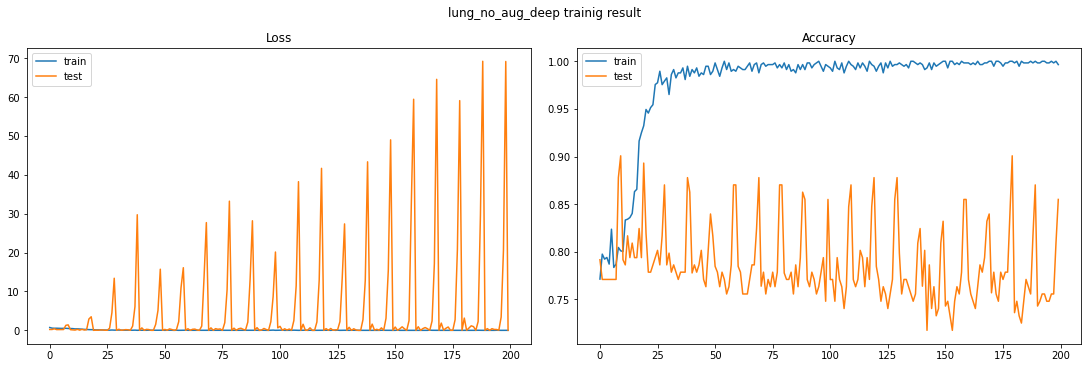

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'{name} trainig result')

_ = ax1.set_title('Loss')
_ = ax1.plot(model.history.history['loss'], label='train')
_ = ax1.plot(model.history.history['val_loss'], label='test')
_ = ax1.legend()

_ = ax2.set_title('Accuracy')
_ = ax2.plot(model.history.history['accuracy'], label='train')
_ = ax2.plot(model.history.history['val_accuracy'], label='test')
_ = ax2.legend()

plt.savefig(f'{name}_trainig_result.png')

## Predictions and metrics

In [14]:
def convert_to_binary(y):
    pred_class = []
    pred_prob = []
    
    for i in range(len(y)):
        pred_prob.append(y[i][0])
                   
        if y[i][0]>=0.5:
            pred_class.append(1)
        else:
            pred_class.append(0)
            
    return np.asarray(pred_class), np.asarray(pred_prob)

In [15]:
#real
y_real = validation_generator.classes

#predicted
test_pred_prob = model.predict(validation_generator)
y_pred_class, y_pred_prob = convert_to_binary(test_pred_prob)

In [16]:
y_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
y_pred_class

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
precision = precision_score(y_real, y_pred_class)
recall = recall_score(y_real, y_pred_class)

fpr_th, tpr_th, _ = roc_curve(y_real, y_pred_prob)
AUC_ROC = auc(fpr_th, tpr_th)

precision_th, recall_th, _ = precision_recall_curve(y_real, y_pred_prob)
PR_AUC = auc(recall_th, precision_th)

In [19]:
print ('Precision =',precision)
print ('Recall =',recall)
print ('Area under ROC curve =',AUC_ROC)
print ('Area under precision-Recall curve =',PR_AUC)

Precision = 0.8181818181818182
Recall = 0.9230769230769231
Area under ROC curve = 0.5871794871794872
Area under precision-Recall curve = 0.8898496879557153


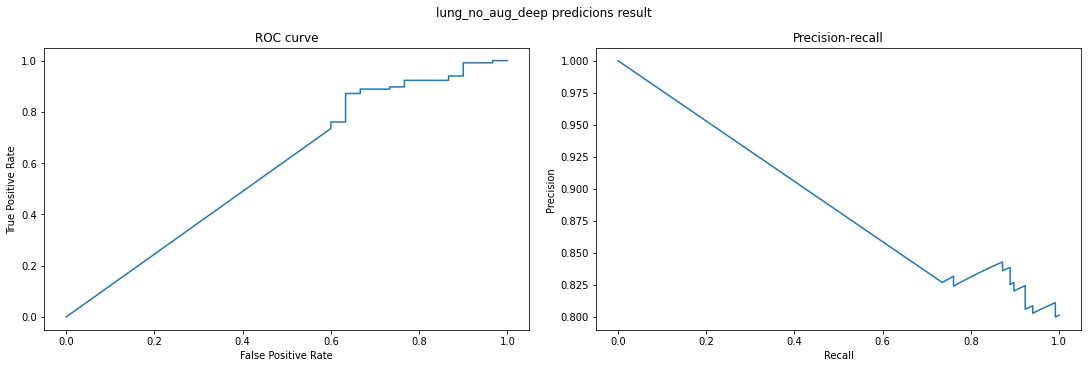

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'{name} predicions result')

_ = ax1.set_title('ROC curve')
_ = ax1.plot(fpr_th, tpr_th)
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')


_ = ax2.set_title('Precision-recall')
_ = ax2.plot(recall_th, precision_th)
_ = ax2.set_xlabel('Recall')
_ = ax2.set_ylabel('Precision')


plt.savefig(f'{name}_predictions_result.png')